<a href="https://colab.research.google.com/github/sanjeewaDeshapriya/AI-ML/blob/main/MULTIPALE%20LINER%20REGRESSION%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv("w1_student_scores-220925-152435.csv")

In [35]:
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
from matplotlib import pyplot as plt

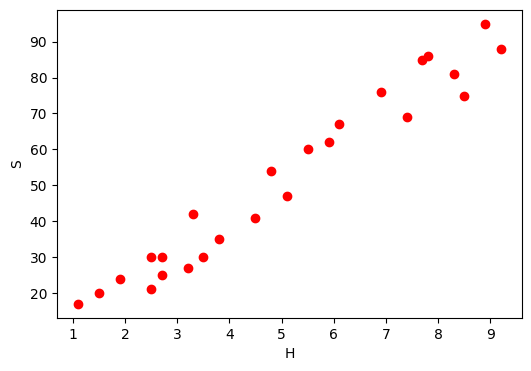

In [37]:
plt.figure(figsize=(6,4))
plt.plot(df['Hours'],df['Scores'],'ro')
plt.xlabel('H')
plt.ylabel('S')
plt.show()

In [38]:
xmean=np.mean(df['Hours'])
ymean= np.mean(df['Scores'])


In [39]:
df['xycov']=(df['Hours']-xmean)*(df['Scores']-ymean)
df['xvar']=(df['Hours']-xmean)**2

slope=df['xycov'].sum()/df['xvar'].sum()
intercept= ymean-(slope*xmean)
print("slope = " , slope)
print("intercept = " , intercept)


slope =  9.775803390787473
intercept =  2.4836734053731817


In [40]:
def predict(h):
    return slope*h+intercept


In [41]:
prediction_THE = intercept+slope*df['Hours']

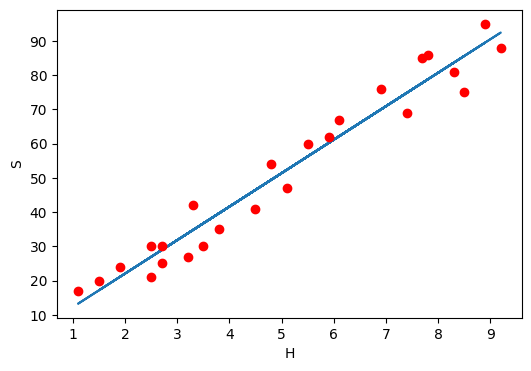

In [42]:
plt.figure(figsize=(6,4))
plt.plot(df['Hours'],prediction_THE)
plt.plot(df['Hours'],df['Scores'],'ro')
plt.xlabel('H')
plt.ylabel('S')
plt.show()

# 2.MULTIPALE REGRASSION

In [43]:
df=pd.read_csv('w1_petrol_consumption-220925-152435.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [44]:
df.shape

(48, 5)

In [45]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


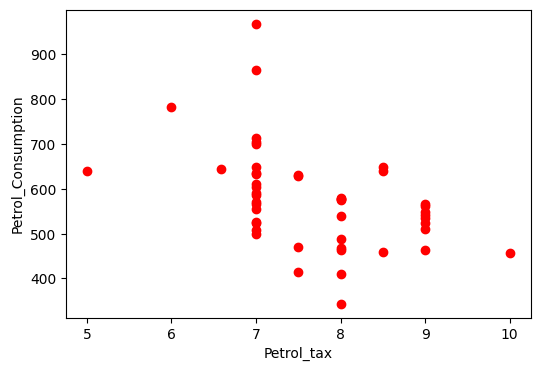

In [46]:
plt.figure(figsize=(6,4))
plt.plot(df['Petrol_tax'],df['Petrol_Consumption'],'ro')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')
plt.show()

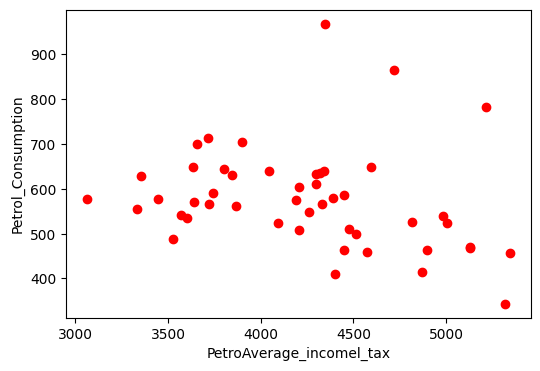

In [47]:
plt.figure(figsize=(6,4))
plt.plot(df['Average_income'],df['Petrol_Consumption'],'ro')
plt.xlabel('PetroAverage_incomel_tax')
plt.ylabel('Petrol_Consumption')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


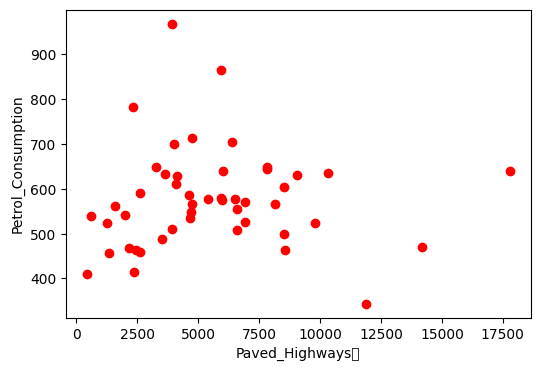

In [49]:
plt.figure(figsize=(6,4))
plt.plot(df['Paved_Highways'],df['Petrol_Consumption'],'ro')
plt.xlabel('Paved_Highways	')
plt.ylabel('Petrol_Consumption')
plt.show()

In [55]:
y=df['Petrol_Consumption']
x=df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
model.intercept_

361.4508790665311

In [59]:
model.coef_

array([-3.69937459e+01, -5.65355145e-02, -4.38217137e-03,  1.34686930e+03])

# prediction

In [60]:
ypredict=model.predict(x_test)

In [63]:
result=pd.DataFrame({'y_test':y_test,'ypredict':ypredict})
print(result)

    y_test    ypredict
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


# Evaluate

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MAE=mean_absolute_error(y_test,ypredict)
MSE=mean_squared_error(y_test,ypredict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test,ypredict)
PRI=model.score(x_test,y_test)
print('MAE = ',MAE)
print('MSE = ',MSE)
print('RMSE = ',RMSE)
print('R2 = ',R2)
print('PRI = ',PRI)

MAE =  53.46854128291668
MSE =  4083.255871745382
RMSE =  63.90035893283685
R2 =  0.3913664001428877
PRI =  0.3913664001428877


In [66]:
model.score(x_train,y_train)

0.7068781342155135

In [67]:
model.score(x_test,y_test)

0.3913664001428877